# NU_data

In [ ]:
!pip install lightgbm

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/Thesis/DATASETS/NU_spatio-temporal_with_distance_data.pkl')
# data.sort_values('TOD')

In [ ]:
data.head()

,id,start_lat,start_lon,stop_lat,stop_lon,quantity,done_at,trip_start,trip_id,customer_id,driver_id,kilometers,stop_start_lat,stop_start_lon,travel_start_time,duration,g_distance,turns,total_distance
0,100274,52.02039,5.15492,51.983227,5.079331,19,2019-01-22 01:43:49+00:00,2019-01-22 00:48:00.239601+00:00,24309,1,533.0,418.0,52.0204,5.15492,2019-01-22 01:01:09.033766+00:00,14.9833,11.582,16,193.992
1,100582,52.02039,5.15492,51.838640,4.957680,11,2019-01-22 02:11:04+00:00,2019-01-22 01:01:09.033766+00:00,24309,1,533.0,418.0,51.9832,5.07933,2019-01-22 01:43:49+00:00,18.9167,21.378,12,193.992
2,100327,52.02039,5.15492,51.979898,4.583965,2,2019-01-22 03:01:26+00:00,2019-01-22 00:47:59.436893+00:00,24309,1,533.0,418.0,51.8386,4.95768,2019-01-22 02:11:04+00:00,38.0333,45.406,17,193.992
3,100611,52.02039,5.15492,51.960995,4.543000,25,2019-01-22 03:22:42+00:00,2019-01-22 00:47:58.148863+00:00,24309,1,533.0,418.0,51.9799,4.58397,2019-01-22 03:01:26+00:00,11.5,5.352,11,193.992
4,100629,52.02039,5.15492,51.965778,4.221331,2,2019-01-22 03:52:17+00:00,2019-01-22 00:50:42.050646+00:00,24309,1,533.0,418.0,51.961,4.543,2019-01-22 03:22:42+00:00,27.2833,29.54,14,193.992


In [ ]:
data[data.trip_id == 24309]

,id,start_lat,start_lon,stop_lat,stop_lon,quantity,done_at,trip_start,trip_id,customer_id,driver_id,kilometers,stop_start_lat,stop_start_lon,travel_start_time,duration,g_distance,turns,total_distance
0,100274,52.02039,5.15492,51.983227,5.079331,19,2019-01-22 01:43:49+00:00,2019-01-22 00:48:00.239601+00:00,24309,1,533.0,418.0,52.0204,5.15492,2019-01-22 01:01:09.033766+00:00,14.9833,11.582,16,193.992
1,100582,52.02039,5.15492,51.838640,4.957680,11,2019-01-22 02:11:04+00:00,2019-01-22 01:01:09.033766+00:00,24309,1,533.0,418.0,51.9832,5.07933,2019-01-22 01:43:49+00:00,18.9167,21.378,12,193.992
2,100327,52.02039,5.15492,51.979898,4.583965,2,2019-01-22 03:01:26+00:00,2019-01-22 00:47:59.436893+00:00,24309,1,533.0,418.0,51.8386,4.95768,2019-01-22 02:11:04+00:00,38.0333,45.406,17,193.992
3,100611,52.02039,5.15492,51.960995,4.543000,25,2019-01-22 03:22:42+00:00,2019-01-22 00:47:58.148863+00:00,24309,1,533.0,418.0,51.9799,4.58397,2019-01-22 03:01:26+00:00,11.5,5.352,11,193.992
4,100629,52.02039,5.15492,51.965778,4.221331,2,2019-01-22 03:52:17+00:00,2019-01-22 00:50:42.050646+00:00,24309,1,533.0,418.0,51.961,4.543,2019-01-22 03:22:42+00:00,27.2833,29.54,14,193.992
5,100548,52.02039,5.15492,51.920352,4.451595,8,2019-01-22 04:07:54+00:00,2019-01-22 00:47:56.887189+00:00,24309,1,533.0,418.0,51.9658,4.22133,2019-01-22 03:52:17+00:00,19.75,21.597,17,193.992
6,100790,52.02039,5.15492,51.909947,4.448196,2,2019-01-22 04:21:33+00:00,2019-01-22 00:47:55.106156+00:00,24309,1,533.0,418.0,51.9204,4.4516,2019-01-22 04:07:54+00:00,5.15,1.805,10,193.992
7,100593,52.02039,5.15492,51.891700,4.566160,19,2019-01-22 04:43:54+00:00,2019-01-22 00:47:56.389478+00:00,24309,1,533.0,418.0,51.9099,4.4482,2019-01-22 04:21:33+00:00,26.6333,24.353,14,193.992
8,100678,52.02039,5.15492,51.833539,4.644188,1,2019-01-22 05:05:40+00:00,2019-01-22 00:50:42.150849+00:00,24309,1,533.0,418.0,51.8917,4.56616,2019-01-22 04:43:54+00:00,16.25,12.347,20,193.992
9,100562,52.02039,5.15492,51.837897,4.635991,16,2019-01-22 05:19:44+00:00,2019-01-22 00:47:53.399479+00:00,24309,1,533.0,418.0,51.8335,4.64419,2019-01-22 05:05:40+00:00,3.9,1.954,10,193.992


In [ ]:
data['depo_location'] = [str(x)+" "+str(y) for x,y in zip(data['start_lat'], data['start_lon'])]
data['delivery_location'] = [str(x)+" "+str(y) for x,y in zip(data['stop_lat'], data['stop_lon'])]
data['travel_start_location'] = [str(x)+" "+str(y) for x,y in zip(data['stop_start_lat'], data['stop_start_lon'])]

In [ ]:
data['delivery_location'][0]

'51.9832269 5.0793309'

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,37113.0,835275.627489,495616.642542,100274.000000,426952.000000,667723.000000,1.327766e+06,2.153861e+06
start_lat,37113.0,52.022497,0.035712,51.361497,52.020184,52.020184,5.202039e+01,5.260021e+01
start_lon,37113.0,5.158654,0.063457,4.745083,5.154920,5.155052,5.155052e+00,6.174062e+00
stop_lat,37113.0,52.133313,0.423264,50.767510,51.930120,52.123700,5.236266e+01,5.341821e+01
stop_lon,37113.0,5.139929,0.652201,3.377800,4.663120,5.017184,5.522570e+00,7.209960e+00
quantity,37113.0,3.806133,6.888916,0.000000,1.000000,1.000000,2.000000e+00,1.300000e+02
trip_id,37113.0,74161.230189,28610.673443,24309.000000,49327.000000,68873.000000,1.002420e+05,1.457600e+05
customer_id,37113.0,562.377145,412.857753,1.000000,1.000000,866.000000,8.660000e+02,8.660000e+02
driver_id,37113.0,886.283135,1676.932599,26.000000,427.000000,598.000000,7.940000e+02,1.673100e+04
kilometers,37113.0,2091.339369,25196.205234,0.000000,205.000000,262.000000,3.780000e+02,7.259740e+05


In [ ]:
data['travel_start_time'][0]

Timestamp('2019-01-22 01:01:09.033766+0000', tz='UTC')

In [ ]:
from sklearn.preprocessing import LabelEncoder

def data_preprocessing(data):

    labelencoder = LabelEncoder()

    # data['depo_location'] = labelencoder.fit_transform(data['depo_location'])
    data['delivery_location'] = labelencoder.fit_transform(data['delivery_location'])
    data['travel_start_location'] = labelencoder.fit_transform(data['travel_start_location'])

    # data['travel_start_time'] = data['Date'].dt.strftime('%Y-%m-%d').astype('str') +' '+ data['TOD'].astype('str')
    data['travel_start_time'] = [dt_tz.replace(tzinfo=None) for dt_tz in data['travel_start_time']]
    data['travel_start_time'] = data['travel_start_time'].astype(np.datetime64)

    data['done_at'] = [dt_tz.replace(tzinfo=None) for dt_tz in data['done_at']]
    data['done_at'] = data['done_at'].astype(np.datetime64)
    # data['travel_start_time'] = data['travel_start_time'].astype(np.datetime64)

    data = data.sort_values('done_at').reset_index(drop=True)

    data['dept_hour'] = data['travel_start_time'].dt.hour
    data['dept_minute'] = data['travel_start_time'].dt.minute
    data['dept_dayofweek'] = data['travel_start_time'].dt.dayofweek
    data['dept_monthofyear'] = data['travel_start_time'].dt.month

    # data['duration'] = data['duration'].astype(np.int64)           
    data['g_distance'] = data['g_distance'].astype(np.int64)          
    data['turns'] = data['turns'].astype(np.int64)             

    data['travel_time'] = (data['done_at'] - data['travel_start_time']).dt.seconds/60 

    data = data.drop(['id','customer_id','total_distance','trip_start','start_lat','start_lon','stop_lat','stop_lon','stop_start_lat','stop_start_lon','depo_location','duration','kilometers'],1)
    
    return data

In [ ]:
processed_data = data_preprocessing(data)

In [ ]:
processed_data

,quantity,done_at,trip_id,driver_id,travel_start_time,g_distance,turns,delivery_location,travel_start_location,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,travel_time
0,19,2019-01-22 01:43:49.000,24309,533.0,2019-01-22 01:01:09.033766,11,16,5796,5802,1,1,1,1,42.650000
1,11,2019-01-22 02:11:04.000,24309,533.0,2019-01-22 01:43:49.000000,21,12,3429,5341,1,43,1,1,27.250000
2,2,2019-01-22 03:01:26.000,24309,533.0,2019-01-22 02:11:04.000000,45,17,5727,3163,2,11,1,1,50.366667
3,25,2019-01-22 03:22:42.000,24309,533.0,2019-01-22 03:01:26.000000,5,11,5424,5284,3,1,1,1,21.266667
4,2,2019-01-22 03:52:17.000,24309,533.0,2019-01-22 03:22:42.000000,29,14,5517,5017,3,22,1,1,29.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37108,22,2021-04-14 01:46:04.376,145758,15347.0,2021-04-14 00:50:28.012000,11,18,6011,5773,0,50,2,4,55.600000
37109,1,2021-04-14 07:41:02.802,145745,415.0,2021-04-14 02:54:04.074000,63,14,1700,5798,2,54,2,4,286.966667
37110,1,2021-04-14 07:43:09.000,145748,433.0,2021-04-14 04:15:53.097000,55,16,11706,5798,4,15,2,4,207.250000
37111,1,2021-04-14 07:50:12.703,145749,713.0,2021-04-14 05:05:27.413000,58,14,10751,5798,5,5,2,4,164.750000


In [ ]:
dataset = processed_data.drop(['done_at','travel_start_time'],1)

In [ ]:
dataset

,quantity,trip_id,driver_id,g_distance,turns,delivery_location,travel_start_location,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,travel_time
0,19,24309,533.0,11,16,5796,5802,1,1,1,1,42.650000
1,11,24309,533.0,21,12,3429,5341,1,43,1,1,27.250000
2,2,24309,533.0,45,17,5727,3163,2,11,1,1,50.366667
3,25,24309,533.0,5,11,5424,5284,3,1,1,1,21.266667
4,2,24309,533.0,29,14,5517,5017,3,22,1,1,29.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
37108,22,145758,15347.0,11,18,6011,5773,0,50,2,4,55.600000
37109,1,145745,415.0,63,14,1700,5798,2,54,2,4,286.966667
37110,1,145748,433.0,55,16,11706,5798,4,15,2,4,207.250000
37111,1,145749,713.0,58,14,10751,5798,5,5,2,4,164.750000


In [ ]:
dataset.to_pickle('/content/drive/MyDrive/Thesis/DATASETS/NU_2_spatial.pkl')

In [ ]:
dataset = pd.read_pickle('/content/drive/MyDrive/Thesis/DATASETS/NU_2_spatial.pkl')

In [ ]:
cleaned_dataset = dataset[dataset.travel_time <= 2*dataset.g_distance]

In [ ]:
# train_data = data[data.dept_monthofyear < 6]
# test_data = data[data.dept_monthofyear == 6]

from sklearn.model_selection import train_test_split

X = cleaned_dataset.drop(['travel_time','trip_id'],1)
y = cleaned_dataset['travel_time']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
train_x

,quantity,driver_id,g_distance,turns,delivery_location,travel_start_location,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear
23749,1,744.0,102,17,848,5798,5,21,3,5
14608,1,923.0,91,17,13275,5802,12,11,4,11
22530,2,559.0,44,14,10461,5798,22,42,4,4
1781,1,543.0,30,21,1227,1186,6,45,2,5
11236,10,433.0,73,17,1660,5802,3,52,3,10
...,...,...,...,...,...,...,...,...,...,...
2093,1,803.0,17,20,13610,12587,7,53,5,5
12187,2,923.0,14,20,12090,11795,15,11,3,10
29579,6,780.0,52,13,6837,5798,5,29,4,8
590,1,148.0,33,13,10043,5798,5,2,5,4


In [ ]:
# train_x, train_y = train_data.drop(['Travel Time'],1), train_data['Travel Time']

In [3]:
import pickle

with open('/content/drive/MyDrive/Thesis/DATASETS/NU_2_data/train_x.pkl','rb') as f:
    train_x = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/NU_2_data/train_y.pkl','rb') as f:
    train_y = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/NU_2_data/test_x.pkl','rb') as f:
    test_x = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/NU_2_data/test_y.pkl','rb') as f:
    test_y = pickle.load(f)

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
hyper_params = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5],
    'bagging_freq': [5,10,15],
    'n_estimators': [300,400,500,800,1000],
    'max_depth': range(4, 12)
}

# Instantiate the regressor: gbm
gbm = lgb.LGBMRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid=hyper_params, estimator=gbm, 
                        scoring='neg_mean_squared_error', cv=10, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(train_x, train_y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9600 out of 9600 | elapsed: 104.6min finished


Best parameters found:  {'bagging_freq': 5, 'learning_rate': 0.02, 'max_depth': 11, 'n_estimators': 1000}
Lowest RMSE found:  18.687018771699645


In [ ]:

# print("Best parameters found: ", grid_mse.best_params_)
# print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

# Best parameters found:  {'bagging_freq': 5, 'learning_rate': 0.02, 'max_depth': 11, 'n_estimators': 800} #### lgb_reg_NU_2.pkl
# Lowest RMSE found:  19.334564626734455

Best parameters found:  {'bagging_freq': 5, 'learning_rate': 0.02, 'max_depth': 11, 'n_estimators': 800}
Lowest RMSE found:  19.334564626734455


In [ ]:
#Fitting lgb regressor 
model = lgb.LGBMRegressor(objective= 'regression', eval_metric= 'rmse',
                         bagging_freq= 5, learning_rate= 0.02, max_depth= 11, n_estimators= 1000)
model.fit(train_x,train_y)
print (model)

LGBMRegressor(bagging_freq=5, eval_metric='rmse', learning_rate=0.02,
              max_depth=11, n_estimators=1000, objective='regression')


In [ ]:
import pickle

file_name = "/content/drive/MyDrive/Thesis/DATASETS/LightGBM/lgb_reg_NU_2_spatial.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

In [4]:
import pickle

file_name = "/content/drive/MyDrive/Thesis/DATASETS/LightGBM/lgb_reg_NU_2_spatial.pkl"
# load
lgb_model_loaded = pickle.load(open(file_name, "rb"))

In [ ]:
# test_x, test_y = test_data.drop(['Travel Time'],1), test_data['Travel Time']

In [ ]:
test_x

,quantity,driver_id,g_distance,turns,delivery_location,travel_start_location,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear
23969,1,450.0,8,13,3271,3149,2,25,5,5
471,2,722.0,10,16,9233,9036,14,36,3,4
3000,1,386.0,7,12,12904,12030,17,56,4,5
12641,12,431.0,17,13,9394,9380,4,33,5,10
36416,1,357.0,2,6,6979,6787,7,28,0,2
...,...,...,...,...,...,...,...,...,...,...
28900,2,433.0,5,17,8839,8140,8,40,4,8
6555,1,242.0,14,18,9495,7920,14,23,4,8
26911,1,559.0,8,10,11895,10043,1,22,1,7
269,24,415.0,9,12,9838,9127,4,49,2,3


In [5]:
# Evaluate Model

from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('MAPE = {:0.2f}%.'.format(mape))
    
    return accuracy

In [6]:
evaluate(lgb_model_loaded, test_x, test_y)

Model Performance
MAE: 10.6535 minutes.
RMSE: 18.31.
R2: 0.76.
Accuracy = -inf%.
MAPE = inf%.


-inf

In [ ]:
predictions = lgb_model_loaded.predict(test_x)

In [ ]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = test_y
pre_ac['Prediction'] = predictions
pre_ac['dayofweek'] = test_x['dept_dayofweek']
pre_ac['travels'] = [l for l in range(0,len(predictions))]

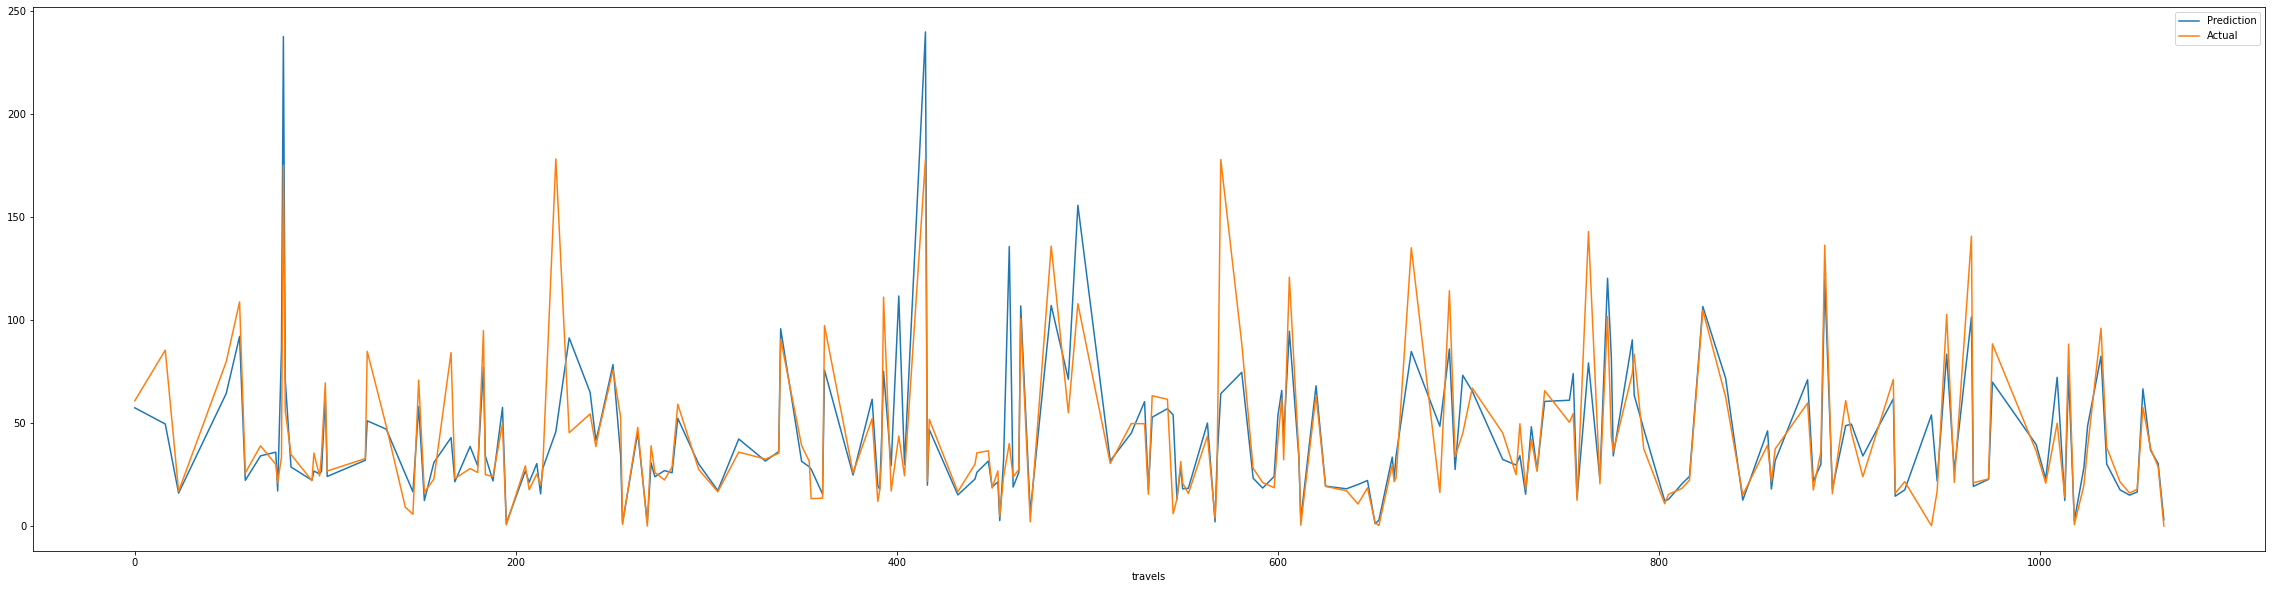

In [ ]:
import matplotlib.pyplot as plt

##### plot according to time of day

pre_ac[pre_ac.dayofweek == 1][0:200].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (40,10)
plt.show()

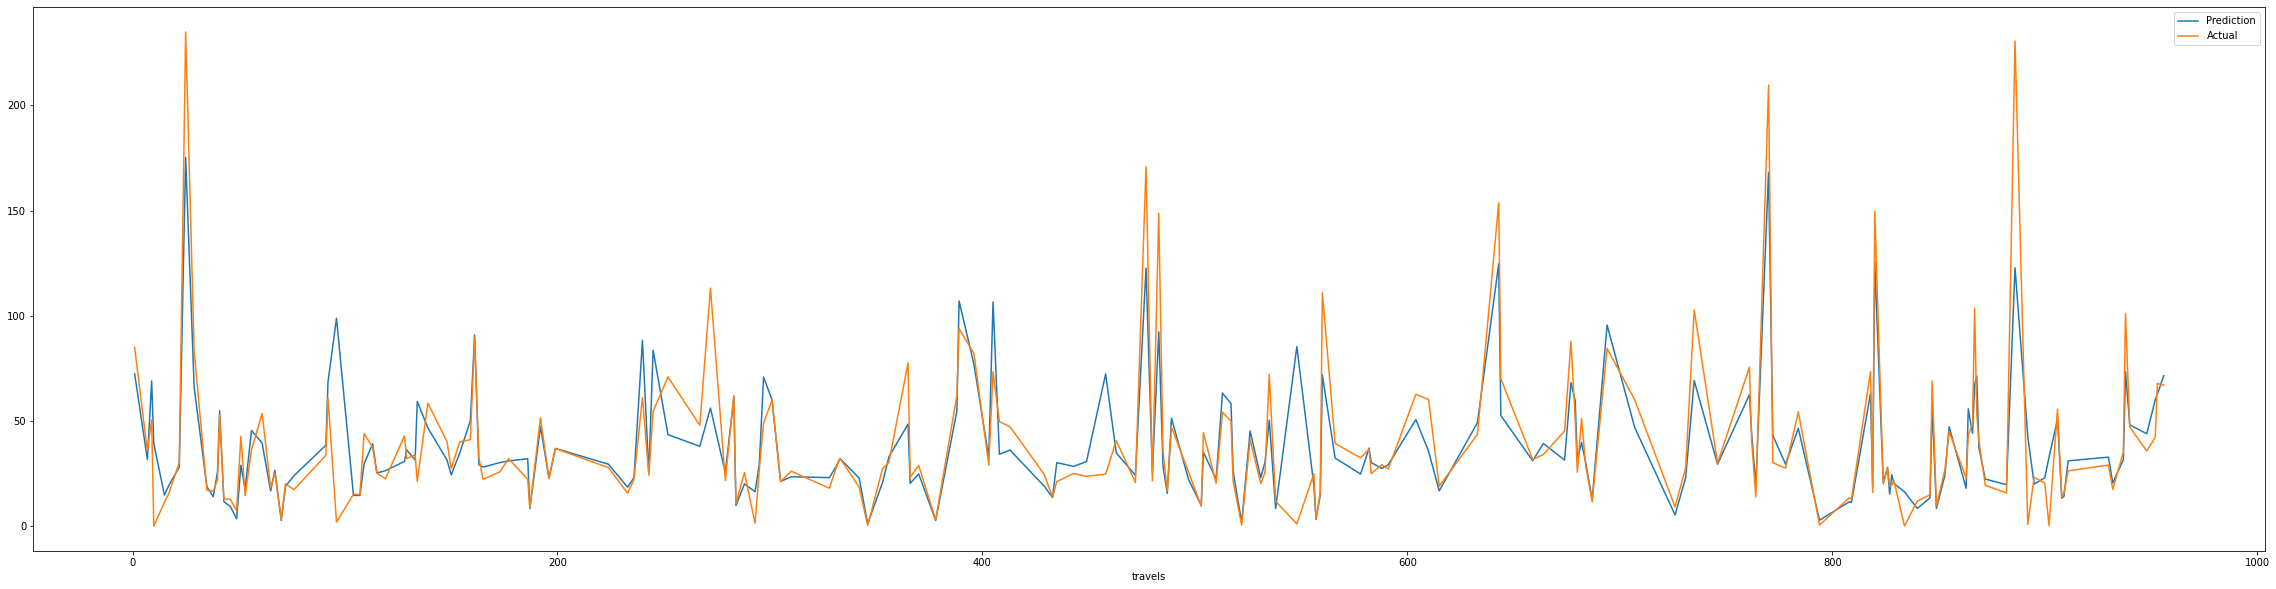

In [ ]:
import matplotlib.pyplot as plt

##### plot according to time of day

pre_ac[pre_ac.dayofweek == 2][0:200].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (40,10)
plt.show()

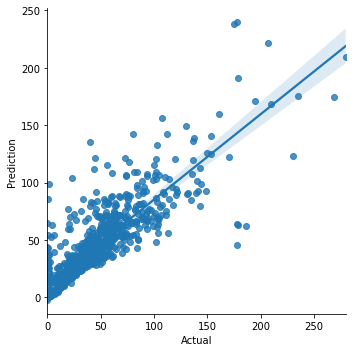

In [ ]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac[0:1000]);

In [5]:
!pip install shap

     |████████████████████████████████| 358kB 8.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491620 sha256=222481b940a6724bd7d1621365de03d443ebf7ad7f51c15aa63733bcede883b2
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [6]:
import shap
 
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(lgb_model_loaded)
shap_values = explainer.shap_values(test_x)

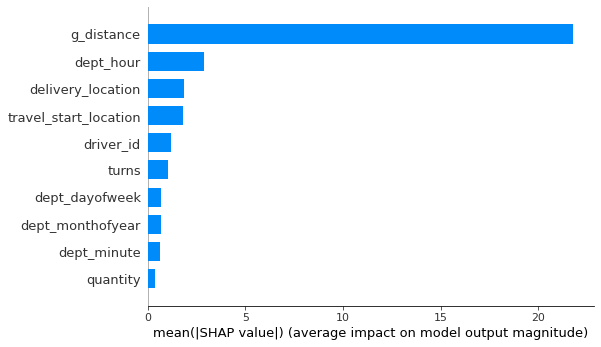

In [ ]:
shap.summary_plot(shap_values, train_x, feature_names = test_x.columns, plot_type="bar")

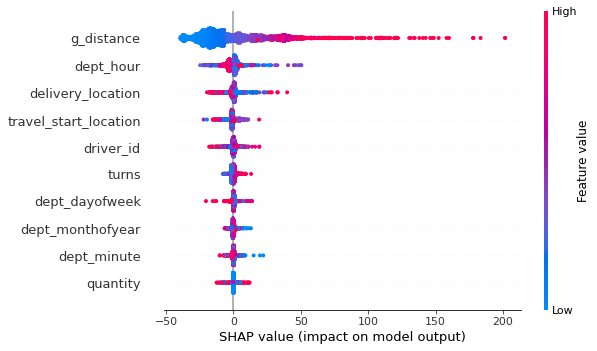

In [7]:
import matplotlib.pyplot as plt

f = plt.figure()
shap.summary_plot(shap_values, test_x, feature_names = test_x.columns)

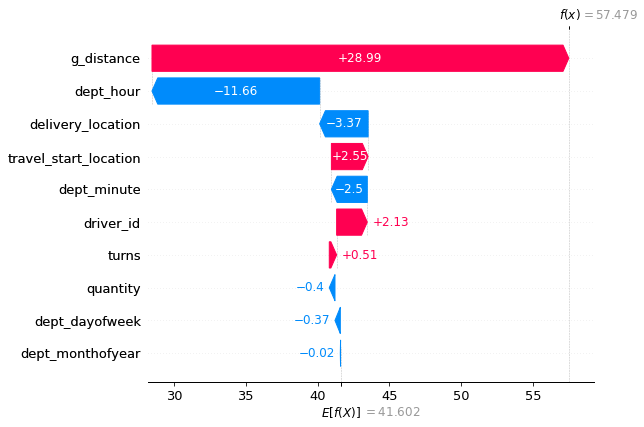

In [ ]:
'''The explanation below shows features each contributing to push the model output from the base value 
(the average model output over the training dataset we passed) to the model output. Features pushing the 
prediction higher are shown in red, those pushing the prediction lower are in blue.'''


shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [ ]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:100], feature_names = test_x.columns, show = True)

In [8]:
# !pip install lime

In [9]:
import lime
import lime.lime_tabular

In [10]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_x.values, feature_names=train_x.columns, verbose=True, mode='regression')

In [11]:
explanation = explainer.explain_instance(test_x.iloc[0].values,lgb_model_loaded.predict, num_features=10)

Intercept 27.925133195409472
Prediction_local [76.8369603]
Right: 57.479011943747345


In [12]:
explanation.show_in_notebook(show_table=True, show_all=False)